## Do the types of crimes committed in Chicago depend on location and time?

## Goals 

In the previous case, we learned how to use the $t$-test and ANOVA to study changes in the mean of different populations. The main goal of this case is to learn how to detect possible interactions between categorical variables. By the end of this case, you should have learned how to use *contingency tables* to explore and design hypotheses of possible dependencies between the categorical features of your data. In addition, you should have learned how to conduct a $\chi^2$-test (Chi-square test) to examine the dependences in the categories you previously hypothesized.   

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import chi2

## Introduction

**Business Context.** Previously, you investigated crime data for the Chicago police department, and discovered many potential factors that could be associated with crime incidents. Now, the police department wants you to finalize your report to them so that they can start implementing some strategies based on your findings. However, because deploying a new strategy is resource intensive, they want you to confirm that the patterns you observed are not merely due to randomness. 

**Business Problem.** The department wants you to determine: **"Are the crime patterns you observed in your prior analysis merely due to chance, or do they represent an actionable signal?"**

**Analytical Context.** In this case, we will learn how to perform hypothesis tests to find out if two discrete variables are independent of each other or if there are patterns between them not due to chance. This establishes if the observed interaction between such variables during exploratory data analysis are **statistically significant**. The testing procedure is usually referred to as the **Chi-square test** and it is performed on contigency tables.

The case is structured as follows: you will (1) set up the contigency table for crime type vs. location; (2) learn about the chi-square test and apply it to this pair to ascertain statistical significance of the pattern we observed during EDA; and (3) apply this test to a few other patterns we observed before.

In [48]:
df = pd.read_csv('Chicago_crime_data.csv', dtype={'ID': object, 'beat_num': object})
pd.options.display.max_rows = 200

In [49]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'beat_num',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [50]:
cross=pd.crosstab(df['Domestic'], df['Arrest'])
cross

Arrest,False,True
Domestic,,
False,179478,45016
True,35276,7408


In [51]:
chi2_contingency(cross)

(165.20895928326414,
 8.234997211784021e-38,
 1,
 array([[180445.18813675,  44048.81186325],
        [ 34308.81186325,   8375.18813675]]))

## Contingency tables

Recall that our original Chicago crime dataset consisted of records of individual incidents. For any given variable (e.g. primary type of crime), each incident has a particular value. For example, the first incident in the dataset is a burglary case and it happened in an apartment:

In [52]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11192233,JB100016,12/31/17 23:58,046XX N ST LOUIS AVE,630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,33.0,14,5,1152214.0,1930694.0,2017,5/4/18 15:51,41.965694,-87.715726,"(41.965693651, -87.715726125)"
1,11196379,JB105867,12/31/17 23:50,024XX N LAKE SHORE DR NB,460,BATTERY,SIMPLE,MOVIE HOUSE/THEATER,False,False,...,43.0,7,08B,1175293.0,1916610.0,2017,5/4/18 15:51,41.926559,-87.631294,"(41.926558908, -87.631294073)"
2,11192540,JB100551,12/31/17 23:48,001XX E SUPERIOR ST,890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,...,42.0,8,6,1177508.0,1905401.0,2017,5/4/18 15:51,41.895751,-87.623496,"(41.895750913, -87.623495923)"
3,11192239,JB100032,12/31/17 23:45,019XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,25.0,31,14,1173432.0,1891037.0,2017,5/4/18 15:51,41.856427,-87.638893,"(41.856426716, -87.638892854)"
4,11192254,JB100003,12/31/17 23:45,115XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,True,...,34.0,53,04B,1178329.0,1828012.0,2017,5/4/18 15:51,41.683369,-87.622830,"(41.683369303, -87.622829524)"


Recall also that we used contingency tables in order to investigate possible correlations and relationships among the different variables. The following table gives the full contingency table for `Primary Type` vs. `Location`:

In [53]:
type_loc_cross = pd.crosstab(df["Primary Type"], df["Location Description"])
type_loc_cross

Location Description,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,...,VACANT LOT,VACANT LOT/LAND,VEHICLE - DELIVERY TRUCK,VEHICLE - OTHER RIDE SERVICE,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)",VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VESTIBULE,WAREHOUSE,YARD
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,10,0,0,0,0,0,0,0,0,0,...,0,7,0,0,0,100,2,0,1,0
ASSAULT,5,0,6,1,9,2,8,8,1,0,...,0,15,1,11,0,98,3,0,20,0
BATTERY,12,19,5,6,13,2,4,25,5,1,...,0,37,0,42,4,646,21,0,28,0
BURGLARY,54,0,0,0,0,0,0,1,0,0,...,0,247,0,0,0,13,3,0,74,0
CONCEALED CARRY LICENSE VIOLATION,0,0,1,2,1,0,0,0,1,0,...,0,0,0,0,0,3,0,0,0,0
CRIM SEXUAL ASSAULT,19,0,0,1,0,0,0,0,0,0,...,0,4,0,2,2,42,3,0,2,0
CRIMINAL DAMAGE,30,0,5,0,2,2,14,3,1,1,...,0,132,0,6,0,543,26,0,27,0
CRIMINAL TRESPASS,29,0,5,0,2,1,1,87,2,0,...,0,21,0,0,0,89,4,0,14,0
DECEPTIVE PRACTICE,2,2,19,11,27,3,11,8,4,3,...,0,1,2,23,3,41,32,0,21,0



The resulting table is a bit too large. One way to deal with this is to select few categories that may be of interest to our client and start our analysis with those. However, before doing this, it is often good practice to group all of our features into larger (meaningful) categories. Two reasons for this are:
    
1. We avoid losing data that might contain valuable patterns for our client (which can happen if we pre-select categories off the bat).
2. If we find a possible dependency between two larger categories, it will tell us to look into their subcategories and study these in more detail.

Luckily for us, we have hired an intern who created the dictionaries ```Locations_dict``` and ```Offenses_dict``` containing a possible set of groupings for our categories:

In [54]:
Locations_dict                     ={
    'Airport & Related' :{
        'AIRCRAFT', 
        'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA',
        'AIRPORT BUILDING NON-TERMINAL - SECURE AREA',
        'AIRPORT EXTERIOR - NON-SECURE AREA',
        'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT PARKING LOT',
        'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA',
        'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
        'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA',
        'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
        'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
        'AIRPORT TRANSPORTATION SYSTEM (ATS)',
        'AIRPORT VENDING ESTABLISHMENT', 'AIRPORT/AIRCRAFT'
    } ,
    
    'Hospitals & Related':{
        'ANIMAL HOSPITAL', 
        'HOSPITAL BUILDING/GROUNDS', 
        'MEDICAL/DENTAL OFFICE', 
        'NURSING HOME',
        'NURSING HOME/RETIREMENT HOME',
    },
    
    'Residential & Related':{
        'APARTMENT',
        'BASEMENT', 
        'STAIRWELL', 
        'CHA APARTMENT', #Chicago Housing Autority
        'CHA HALLWAY',
        'CHA HALLWAY/STAIRWELL/ELEVATOR',
        'CHA PARKING LOT',
        'CHA PARKING LOT/GROUNDS', 
        'DRIVEWAY - RESIDENTIAL', 
        'PORCH',
        'RESIDENCE',
        'RESIDENCE PORCH/HALLWAY',
        'RESIDENCE-GARAGE',
        'RESIDENTIAL YARD (FRONT/BACK)',  
        'ROOMING HOUSE',
        'GARAGE', 
        'HOTEL/MOTEL',
        'HOUSE',
    },
    
    'Colleges & Related': {
        'SCHOOL, PRIVATE, BUILDING',
        'SCHOOL, PRIVATE, GROUNDS',
        'SCHOOL, PUBLIC, BUILDING',
        'SCHOOL, PUBLIC, GROUNDS', 
        'COLLEGE/UNIVERSITY GROUNDS',
        'COLLEGE/UNIVERSITY RESIDENCE HALL', 
        'DAY CARE CENTER', 
        'SCHOOL YARD',
                         },
    
    'Goverment Buildings & Related':{ 
        'FEDERAL BUILDING',
        'FIRE STATION', 
        'FOREST PRESERVE', 
        'POLICE FACILITY/VEH PARKING LOT',
        'GOVERNMENT BUILDING/PROPERTY', 
        'JAIL / LOCK-UP FACILITY', 
        'LIBRARY',
        'PARK PROPERTY',},
    
    'Liquor Stores & Related':{
        'TAVERN',
        'TAVERN/LIQUOR STORE', 
        'BAR OR TAVERN', 
        'CLUB',  
        'POOL ROOM',
         },
    
    'Stores & Related':{
        'SMALL RETAIL STORE',
        'APPLIANCE STORE',
        'BARBERSHOP', 
        'ATHLETIC CLUB', 
        'BOWLING ALLEY', 
        'CAR WASH', 
        'CLEANING STORE', 
        'COIN OPERATED MACHINE', 
        'COMMERCIAL / BUSINESS OFFICE',
        'CONVENIENCE STORE', 
        'DEPARTMENT STORE', 
        'DRUG STORE', 
        'VESTIBULE',  
        'GAS STATION',
        'GAS STATION DRIVE/PROP.', 
        'RESTAURANT', 
        'GROCERY FOOD STORE', 
        'RETAIL STORE', 
        'MOVIE HOUSE/THEATER', 
        'FACTORY/MANUFACTURING BUILDING',
        'NEWSSTAND',
        'PARKING LOT',},
    
    'Vehicles & Related':{
        'VEHICLE - DELIVERY TRUCK',
        'VEHICLE - OTHER RIDE SERVICE',
        'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)',
        'VEHICLE NON-COMMERCIAL',
        'VEHICLE-COMMERCIAL','TAXICAB', 'AUTO',
        'AUTO / BOAT / RV DEALERSHIP','BOAT/WATERCRAFT', 'GANGWAY', 'OTHER COMMERCIAL TRANSPORTATION',
        
        
    }, 
    
    'Public Transport & Related':{
        'CTA "L" PLATFORM',
        'CTA BUS',
        'CTA BUS STOP',
        'CTA GARAGE / OTHER PROPERTY',
        'CTA PLATFORM',
        'CTA PROPERTY',
        'CTA STATION',
        'CTA TRACKS - RIGHT OF WAY',
        'CTA TRAIN', 'OTHER RAILROAD PROP / TRAIN DEPOT',

                    },
    
    'Street & Related': {
        'ALLEY', 
        'BRIDGE', 
        'CEMETARY',
        'CHURCH',
        'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 
        'CONSTRUCTION SITE', 
        'DRIVEWAY', 
        'YARD', 
        'VACANT LOT',
        'VACANT LOT/LAND', 
        'SIDEWALK', 
        'PARKING LOT/GARAGE(NON.RESID.)', 
        'ABANDONED BUILDING', 
        'STREET', 
        'HIGHWAY/EXPRESSWAY',  
        'HALLWAY',
        'LAKEFRONT/WATERFRONT/RIVERBANK', 
        'SPORTS ARENA/STADIUM'    
        
    },
    
    'Bank & Related':{
        'BANK',
        'ATM (AUTOMATIC TELLER MACHINE)', 
        'CREDIT UNION', 
        'CURRENCY EXCHANGE', 
        'RIVER BANK',
        'SAVINGS AND LOAN', 
        'PAWN SHOP', 
        'WAREHOUSE'},
    
    'Other Locations':{'OTHER', }
    
}


Offenses_dict={
    'Theft Related': {
        'BURGLARY', 
        'THEFT',
        'CRIMINAL TRESPASS', 
        'MOTOR VEHICLE THEFT', 
        'ROBBERY',
        },
    
    'Property Damage': {
        'CRIMINAL DAMAGE', 
        'ARSON', 
        },

    'Violence & Related' :{
        'BATTERY',
        'ASSAULT',
        'KIDNAPPING',   
        'HOMICIDE', 
        },
    
    'Sexual Offenses & Related':{
        'CRIM SEXUAL ASSAULT',
        'SEX OFFENSE',
        'OBSCENITY',
        'HUMAN TRAFFICKING', 
        'PROSTITUTION',
        'PUBLIC INDECENCY',
        'STALKING',
        'OFFENSE INVOLVING CHILDREN'},
    
    'Dangerous practices':{ 
        'DECEPTIVE PRACTICE', 
        'WEAPONS VIOLATION',
        'INTIMIDATION',
        'CONCEALED CARRY LICENSE VIOLATION',
        'INTERFERENCE WITH PUBLIC OFFICER'},
    
    'Substances & Related':{
        'NARCOTICS',
        'OTHER NARCOTIC VIOLATION',
        'GAMBLING', 
        'LIQUOR LAW VIOLATION'},
    
    'Other Offenses':{
        'PUBLIC PEACE VIOLATION'
        'NON-CRIMINAL',
        'OTHER OFFENSE',
        'NON-CRIMINAL (SUBJECT SPECIFIED)' }}

### Exercise 1:

Use the provided dictionaries to create a contingency table of the grouped categories. What conclusions can you make? 

**Answer.**

----------

In order to visualize the data a little better, let's calculate and plot the proportions of offenses that occurred in each location category. This can be done as follows:

In [56]:
Offense_Location_prop= round(Offense_Location_cross.div(Offense_Location_cross.sum(axis=1), axis=0)*100,2)
Offense_Location_prop

Location_cat,Airport & Related,Bank & Related,Colleges & Related,Goverment Buildings & Related,Hospitals & Related,Liquor Stores & Related,Other Locations,Public Transport & Related,Residential & Related,Stores & Related,Street & Related,Vehicles & Related
Offenses_cat,,,,,,,,,,,,
Dangerous practices,1.05,6.38,0.74,0.86,0.59,0.94,9.68,1.82,39.30,13.76,22.47,2.42
Other Offenses,0.35,0.15,1.46,1.33,0.87,0.28,7.86,0.21,55.43,4.82,25.71,1.53
Property Damage,0.12,0.40,1.13,0.93,0.38,0.34,2.77,1.84,41.19,5.65,42.88,2.38
Sexual Offenses & Related,0.15,0.10,4.69,2.19,2.49,0.55,4.03,1.69,57.41,1.88,22.82,1.99
Substances & Related,0.50,0.06,1.58,5.74,0.80,0.89,1.24,1.35,15.67,2.99,63.95,5.24
Theft Related,0.58,0.48,1.14,1.28,0.68,1.18,4.29,2.53,26.84,19.73,38.89,2.39
Violence & Related,0.26,0.18,4.30,1.47,1.32,1.10,2.57,1.87,46.27,6.12,33.10,1.45


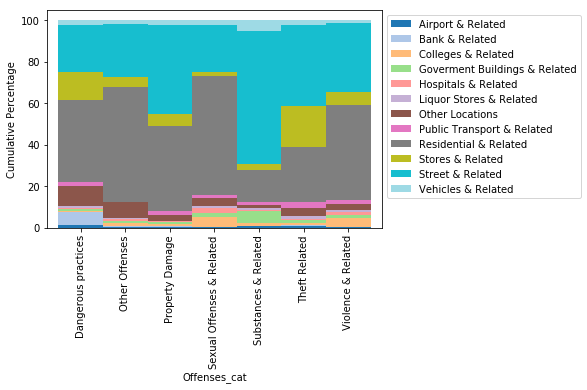

In [57]:
plt_prop = Offense_Location_prop.plot(kind='bar', stacked = True, width = 1,colormap='tab20')
plt_prop.legend(bbox_to_anchor=(1,1), loc='upper left', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

### Exercise 2:

What conclusions can you make from the plot and table above?

**Answer.**

----------

We can also flip the script and construct the table with the proportions of crime types for each location category. Looking at both sets of proportions can give us information that was not so apparent from the contingency table itself:

In [58]:
Location_Offense_prop= round(Offense_Location_cross.div(Offense_Location_cross.sum(axis=0), axis=1)*100,2)
Location_Offense_prop

Location_cat,Airport & Related,Bank & Related,Colleges & Related,Goverment Buildings & Related,Hospitals & Related,Liquor Stores & Related,Other Locations,Public Transport & Related,Residential & Related,Stores & Related,Street & Related,Vehicles & Related
Offenses_cat,,,,,,,,,,,,
Dangerous practices,20.74,65.81,3.29,5.24,6.18,8.86,20.67,8.29,9.71,10.44,5.62,9.92
Other Offenses,4.94,1.07,4.63,5.85,6.53,1.88,12.02,0.68,9.81,2.62,4.60,4.50
Property Damage,2.80,5.01,6.14,6.97,4.83,3.88,7.24,10.26,12.47,5.25,13.13,11.98
Sexual Offenses & Related,0.74,0.26,5.15,3.33,6.49,1.29,2.14,1.91,3.52,0.35,1.42,2.03
Substances & Related,4.94,0.30,3.49,17.60,4.22,4.19,1.32,3.08,1.94,1.13,8.00,10.75
Theft Related,51.03,22.32,22.44,35.02,31.82,49.86,40.84,51.28,29.60,66.82,43.39,43.69
Violence & Related,14.81,5.23,54.85,25.99,39.92,30.03,15.78,24.50,32.95,13.39,23.85,17.14


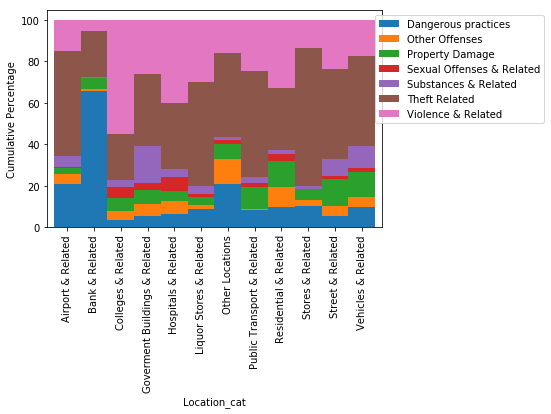

In [59]:
plt_prop_new = Location_Offense_prop.transpose().plot(kind='bar', stacked = True, width = 1)
plt_prop_new.legend(bbox_to_anchor=(1.5,1), loc='upper right', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

### Exercise 3:

What conclusions can you make from the table and stacked bar chart above? Do these results still support a crime type-location type interaction?

**Answer.**

----------

## Chi-square test based on contingency tables

We have generated the contingency table of `Primary Type` vs. `Location Description` and observed that the crime type specific breakdowns of locations are not uniform. We conclude that there might be an interaction between these two variables. We can formally test if the variations we observed indeed reflect actual differences or if they are just a byproduct of randomness. There are many different ways to perform the test but we will focus on the most widely used test: the **Chi-square test** ($\chi^2$-test). The null hypothesis for the Chi-square test is:

$$
H_0:\text{Primary Type is independent of Location Description}
$$

We do not need a formal definition for "independent". Intuitively, "independence between two variables" means that the distribution of values of one variable remains the same even as the value of the second variable changes (and vice versa). In our case, this means that the proportions of different crime types remains the same even as we look at different crime locations. The data seems to indicate otherwise, so let's discuss how to numerically summarize the data to formally examine the null hypothesis:

In [60]:
type_prop = (df["Primary Type"].value_counts()/df["Primary Type"].count()).sort_index()
type_prop

ARSON                                0.001662
ASSAULT                              0.072251
BATTERY                              0.184214
BURGLARY                             0.048657
CONCEALED CARRY LICENSE VIOLATION    0.000258
CRIM SEXUAL ASSAULT                  0.006105
CRIMINAL DAMAGE                      0.108703
CRIMINAL TRESPASS                    0.025507
DECEPTIVE PRACTICE                   0.067674
GAMBLING                             0.000715
HOMICIDE                             0.002526
HUMAN TRAFFICKING                    0.000030
INTERFERENCE WITH PUBLIC OFFICER     0.004068
INTIMIDATION                         0.000565
KIDNAPPING                           0.000711
LIQUOR LAW VIOLATION                 0.000715
MOTOR VEHICLE THEFT                  0.042612
NARCOTICS                            0.043638
NON-CRIMINAL                         0.000138
NON-CRIMINAL (SUBJECT SPECIFIED)     0.000007
OBSCENITY                            0.000322
OFFENSE INVOLVING CHILDREN        

Similarly, the proportions of all distinct values of `Location Description` are:

In [61]:
location_prop = (df["Location Description"].value_counts()/df["Location Description"].count()).sort_index()
location_prop

ABANDONED BUILDING                                       0.001235
AIRCRAFT                                                 0.000277
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA          0.000371
AIRPORT BUILDING NON-TERMINAL - SECURE AREA              0.000299
AIRPORT EXTERIOR - NON-SECURE AREA                       0.000341
AIRPORT EXTERIOR - SECURE AREA                           0.000094
AIRPORT PARKING LOT                                      0.000322
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA           0.000793
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA               0.000213
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA             0.000041
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA           0.000296
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA               0.000861
AIRPORT TRANSPORTATION SYSTEM (ATS)                      0.000034
AIRPORT VENDING ESTABLISHMENT                            0.000442
AIRPORT/AIRCRAFT                                         0.000277
ALLEY     

Under the null hypothesis, the expected numbers of occurrences for all pairwise combinations of values of `Primary Type` and `Location Description` should be the product of the corresponding values in the above two tables, times the total number of records in the dataset. For example, the total number of occurrences of battery crime in apartments should be approximately 0.184214 times 0.125190 times the total number of crime instances in our entire dataset.



In [62]:
primary_location_cross = pd.crosstab(df['Primary Type'], df['Location'])
g, p, dof, expctd = chi2_contingency(primary_location_cross)
print("p-value of Chi-square test for Primary Type vs. Location =", p)

p-value of Chi-square test for Primary Type vs. Location = 0.0


We can see the $p$ - value is extremely small and thus reject the null hypothesis and conclude that `Primary Type` and `Location Description` are not independent. In other words, the proportions of distinct value of `Primary Type` do not remain the same across different values of `Location Description`, which is exactly what we observed in the data.

### Exercise 4:

Our client is interested in violent crimes around residential areas. In order to gather some information, you talk to a police officer who tells you the following: 

"From my experience, violent crime offenses do not discriminate by location around residential areas. I have seen everything happen, everywhere." 

What do you think about this statement? Use a Chi-squared test to verify your findings.

**Answer.**

----------

## Chi-square test for primary type vs. day of week

Sometimes, when we perform the Chi-square test, one of the variables (or even both of them) is not naturally discrete (for example, crime time). However, we can discretize the variable and perform the Chi-square test on the discretized versions. We will now discretize the time variable into day-of-the-week buckets and test if the day of the week is independent of crime types. This test will inform us if we should vary police force deployment according to the day of week. Let's get started:

In [65]:
# discretize time
df["date_py"] = pd.to_datetime(df.Date)
df["day_of_week"] = df.date_py.dt.dayofweek
type_dow_cross = pd.crosstab(df['Primary Type'], df['day_of_week'])
type_dow_cross

day_of_week,0,1,2,3,4,5,6
Primary Type,,,,,,,
ARSON,70,61,73,64,58,54,64
ASSAULT,2820,2805,2868,2794,2777,2552,2688
BATTERY,6754,6540,6427,6423,6757,7702,8615
BURGLARY,1928,1895,2017,1873,2179,1610,1498
CONCEALED CARRY LICENSE VIOLATION,10,8,6,12,10,13,10
CRIM SEXUAL ASSAULT,211,189,211,177,204,288,351
CRIMINAL DAMAGE,4163,3985,3818,3881,4070,4497,4629
CRIMINAL TRESPASS,1010,963,967,1040,1002,941,892
DECEPTIVE PRACTICE,2816,2725,2707,2759,2934,2318,1822


The following code gives the result of performing a Chi-square test:

In [66]:
g, p, dof, expctd = chi2_contingency(type_dow_cross)
print("p-value of Chi-square test for Primary Type vs. Day of week =", p)

p-value of Chi-square test for Primary Type vs. Day of week = 1.7125583255212727e-292


The results indicate that `Primary Type` and `day_of_week` are not independent. Let's visualize the distribution of the top 10 crimes for each day of the week with a stacked bar chart:

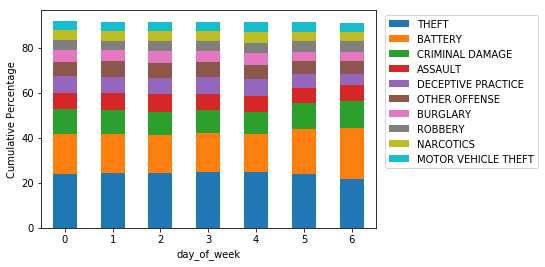

In [70]:
row_idx = df['Primary Type'].value_counts().index[:10]
type_dow_plt_dat = round(type_dow_cross.div(type_dow_cross.sum(axis=0), axis=1).loc[row_idx,:]*100,2).T
plt_type_dow = type_dow_plt_dat.plot(kind='bar', stacked = True, rot = 0)
plt_type_dow.legend(bbox_to_anchor=(1.5,1), loc='upper right', ncol = 1)
_ = plt.ylabel("Cumulative Percentage")

From this, we can see that battery tends to be more prevalent on Fridays and Saturdays, while theft tends to decrease on Saturdays.

### Exercise 5:

We suspect that throughout the course of a typical day, the distribution of crime locations may shift materially. Conduct a test to determine if this is the case. If this is the case, identify the potential shift by constructing a stacked bar chart that shows the proportion of crimes in each of the top 10 locations for each hour of the day.

**Answer.**

----------

## Conclusions

In this case, we performed the Chi-square test to validate various patterns and relationships that we observed between various features in our previous EDA of Chicago crime incidents. This test provided statistical evidence that the pattern we saw in the contingency tables previously was not just due to chance. This provides strong backing for the police department to take the big step of reorganizing their force in line with our observations.

## Takeaways

In this case, we've learned another method to statistically validate the patterns we observe from exploratory data analysis. More specifically, we have:

1. Learned how contingency tables are useful for detecting patterns across categorical variables. In particular, we have seen that taking proportions and using stacked bar plots is useful to better understand the results of a contingency table. 
2. Learned the concept of feature independence. This is a fundamental concept in statistics and data analysis. If we want to detect patterns in data, it is fundamental that we first look for evidence of dependency across features. 
3. Learned how to perform Chi-squared tests to examine if two discrete factors are independent. This test, along with the $t$-test, is one the pillars of statistical hypothesis. You will use these tests very often when analyzing data. 
4. Finally, we have learned how to deal with continuous variables such as time when using the Chi-squared test. This is done by creating artificial (but meaningful) categories which allow us to implement the test in these instances as well.